In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample

from itertools import chain
from random import sample 
import scipy

In [2]:
data = pd.read_csv('findings_data.csv')
data.head()

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size
0,1,1,Cardiomegaly|Emphysema,57,M,NaN
1,2,2,No Finding,77,M,NaN
2,3,3,Atelectasis,79,M,NaN
3,4,4,Cardiomegaly|Edema|Effusion,55,F,NaN
4,5,5,Consolidation|Mass,68,M,2516.0


In [5]:
all_lables = np.unique(list(chain(*data['Finding Labels'].map(lambda x: x.split('|')).tolist())))
all_lables

array(['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema',
       'Effusion', 'Emphysema', 'Fibrosis', 'Infiltration', 'Mass',
       'No Finding', 'Nodule', 'Pleural_Thickening', 'Pneumonia',
       'Pneumothorax'], dtype='<U18')

In [8]:
all_labels = [x for x in all_lables if len(x) > 0]
print('All Labels ({}): {}'.format(len(all_lables), all_lables))

All Labels (14): ['Atelectasis' 'Cardiomegaly' 'Consolidation' 'Edema' 'Effusion'
 'Emphysema' 'Fibrosis' 'Infiltration' 'Mass' 'No Finding' 'Nodule'
 'Pleural_Thickening' 'Pneumonia' 'Pneumothorax']


In [13]:
for c_label in all_lables:
    if(len(c_label) > 1):
        data[c_label]=data['Finding Labels'].map(lambda finding: 1.0 if c_label in finding else 0)
data.sample(4)

,Unnamed: 0,Patient ID,Finding Labels,Patient Age,Patient Gender,Mass_Size,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Infiltration,Mass,No Finding,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
863,864,864,No Finding,35,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
824,825,825,Cardiomegaly,43,M,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,96,96,Fibrosis,38,M,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
143,144,144,Effusion,66,F,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
len(all_labels)

14

In [16]:
data[all_labels].sum()/len(data)

Atelectasis           0.093093
Cardiomegaly          0.038038
Consolidation         0.043043
Edema                 0.016016
Effusion              0.095095
Emphysema             0.018018
Fibrosis              0.027027
Infiltration          0.134134
Mass                  0.035035
No Finding            0.575576
Nodule                0.041041
Pleural_Thickening    0.032032
Pneumonia             0.006006
Pneumothorax          0.033033
dtype: float64

[Text(0, 0.5, 'Number of images with labels')]

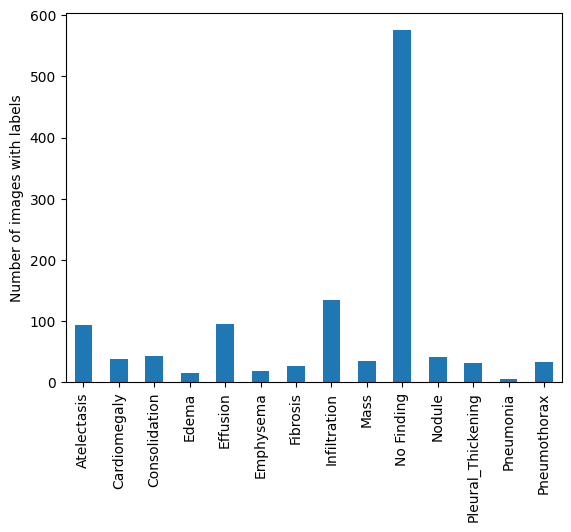

In [17]:
ax = data[all_labels].sum().plot(kind='bar')
ax.set(ylabel = "Number of images with labels")

<Axes: xlabel='Finding Labels'>

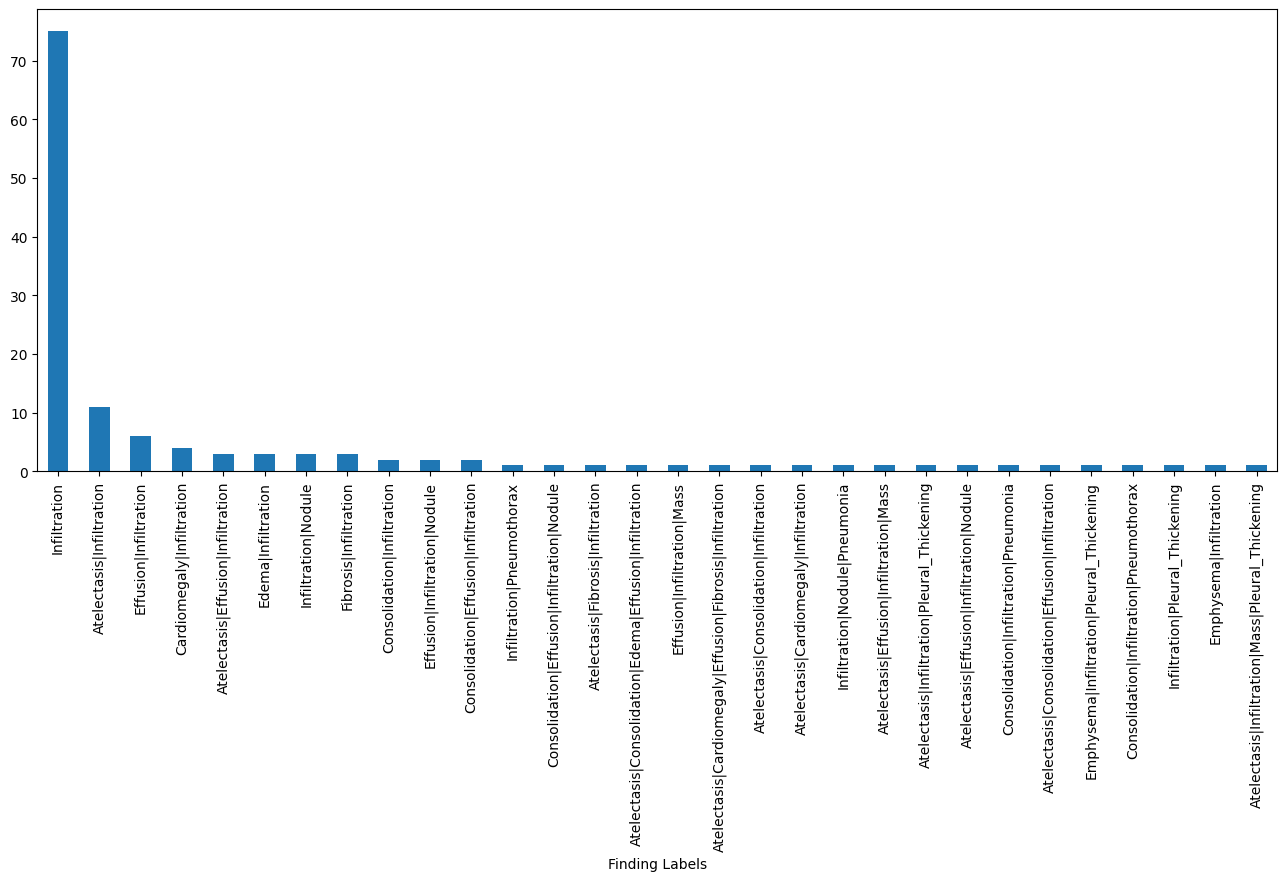

In [19]:
plt.figure(figsize=(16, 6))
data[data.Infiltration==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

<Axes: xlabel='Finding Labels'>

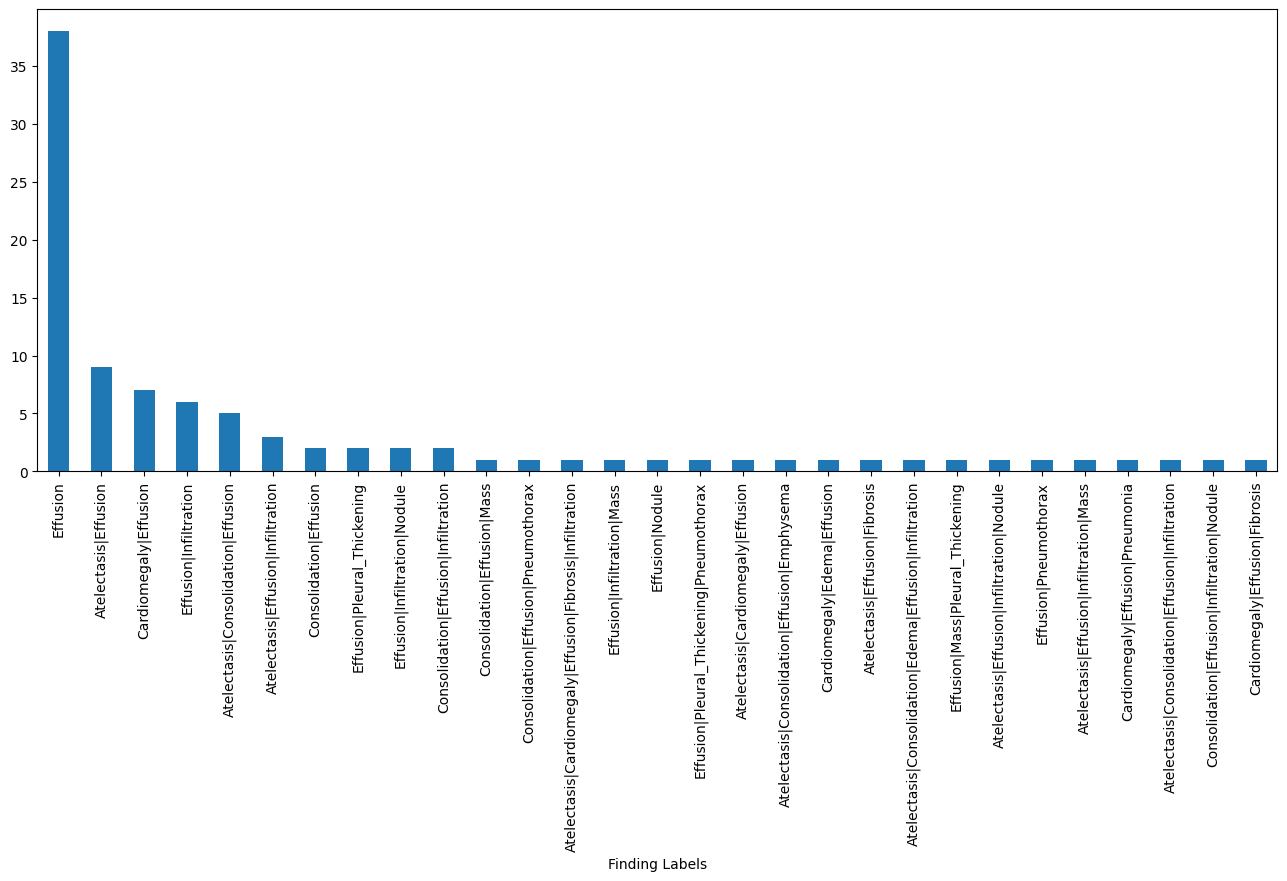

In [20]:
plt.figure(figsize=(16, 6))
data[data.Effusion==1]['Finding Labels'].value_counts()[0:30].plot(kind='bar')

(array([ 29.,  51.,  60.,  96., 154., 194., 229., 109.,  58.,  19.]),
 array([ 6. , 14.1, 22.2, 30.3, 38.4, 46.5, 54.6, 62.7, 70.8, 78.9, 87. ]),
 <BarContainer object of 10 artists>)

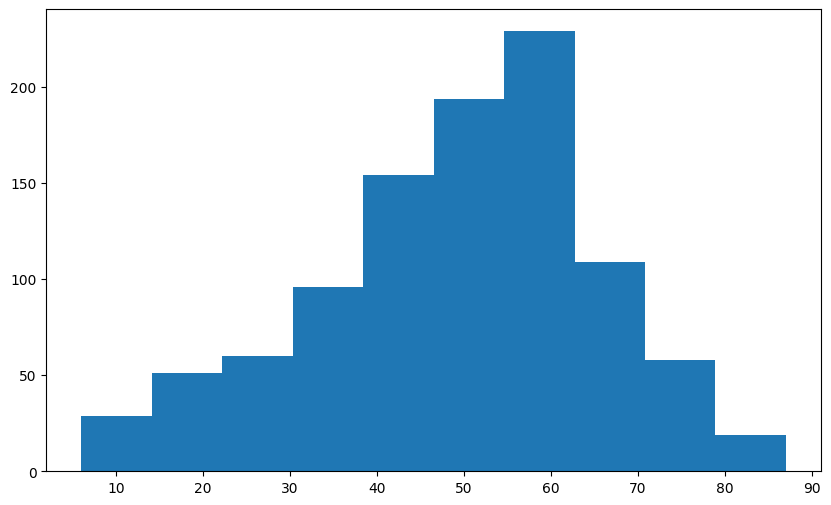

In [22]:
plt.figure(figsize=(10,6))
plt.hist(data['Patient Age'])

(array([ 8., 11., 14., 15., 18., 27., 30.,  4.,  4.,  3.]),
 array([11. , 18.6, 26.2, 33.8, 41.4, 49. , 56.6, 64.2, 71.8, 79.4, 87. ]),
 <BarContainer object of 10 artists>)

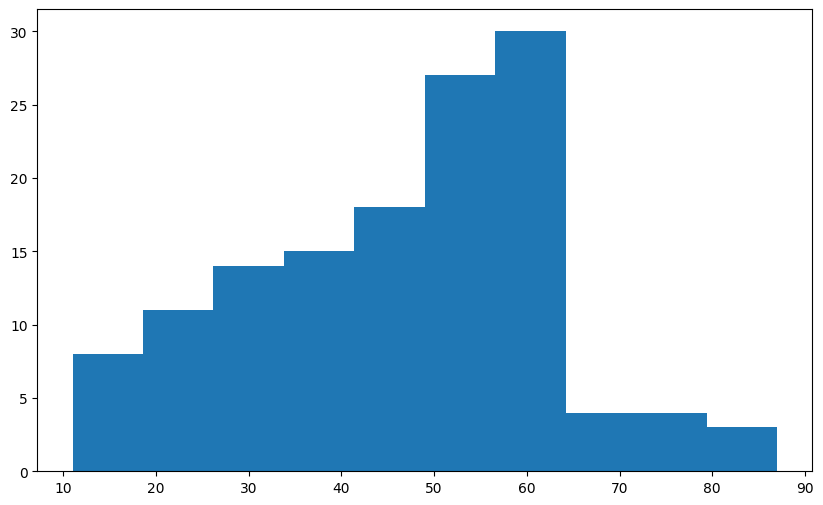

In [25]:
plt.figure(figsize=(10,6))
plt.hist(data[data.Infiltration==1]['Patient Age'])

(array([ 2.,  1.,  6.,  7.,  9., 13., 31., 13.,  7.,  6.]),
 array([11., 18., 25., 32., 39., 46., 53., 60., 67., 74., 81.]),
 <BarContainer object of 10 artists>)

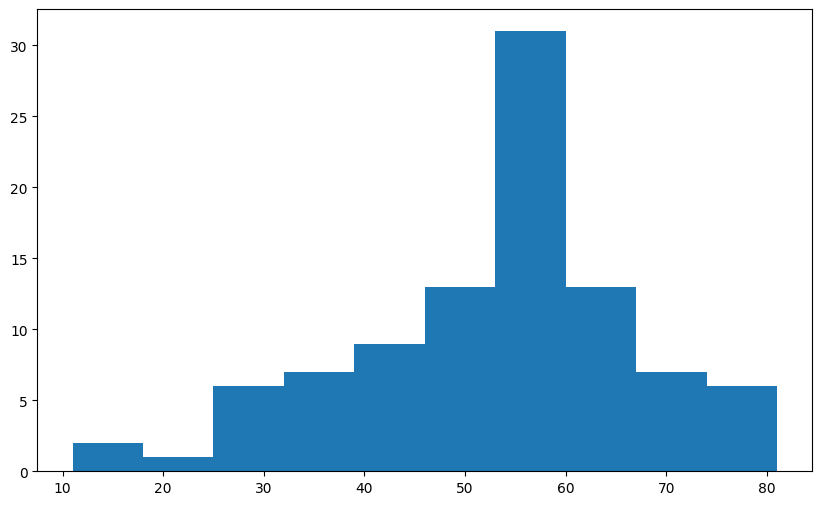

In [27]:
plt.figure(figsize=(10,6))
plt.hist(data[data.Effusion==1]['Patient Age'])

<Axes: xlabel='Patient Gender'>

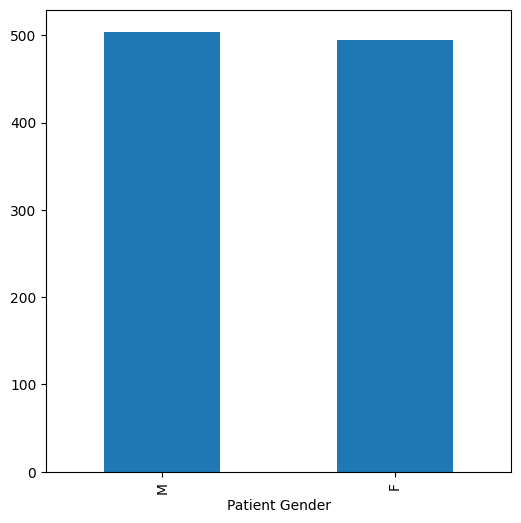

In [28]:
plt.figure(figsize=(6,6))
data['Patient Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Patient Gender'>

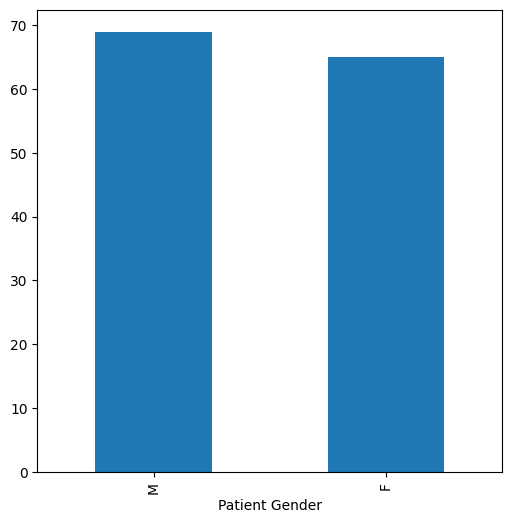

In [30]:
plt.figure(figsize=(6,6))
data[data.Infiltration==1]['Patient Gender'].value_counts().plot(kind='bar')

<Axes: xlabel='Patient Gender'>

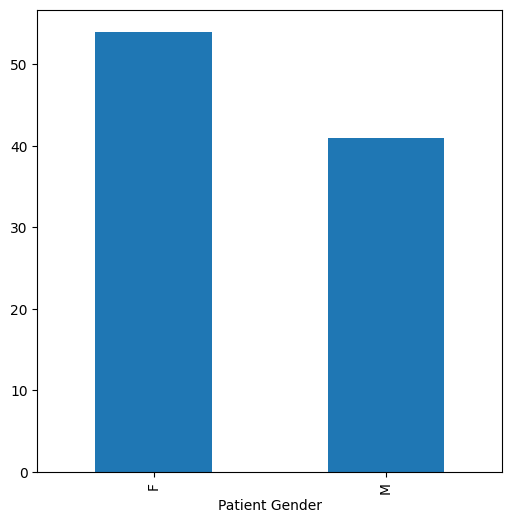

In [31]:
plt.figure(figsize=(6,6))
data[data.Effusion==1]['Patient Gender'].value_counts().plot(kind='bar')

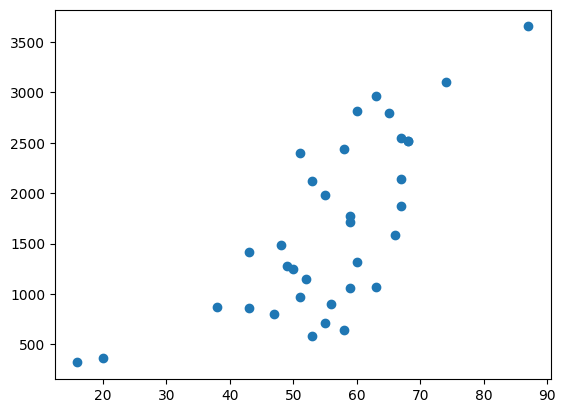

In [33]:
plt.scatter(data['Patient Age'], data['Mass_Size'])

In [35]:
mass_sizes = data['Mass_Size'].values
mass_inds = np.where(~np.isnan(mass_sizes))
ages = data.iloc[mass_inds]['Patient Age']
mass_sizes=mass_sizes[mass_inds]
scipy.stats.pearsonr(mass_sizes,ages)

PearsonRResult(statistic=0.7275663300043572, pvalue=7.354553889322028e-07)

In [37]:
np.mean(data[data['Patient Gender']== 'M']['Mass_Size'])

1735.7

In [38]:
np.mean(data[data['Patient Gender']== 'F']['Mass_Size'])

1550.8

In [40]:
scipy.stats.ttest_ind(data[data['Patient Gender']== 'F']['Mass_Size'],data[data['Patient Gender']== 'M']['Mass_Size'],nan_policy='omit')

TtestResult(statistic=-0.6188395721019645, pvalue=0.5402707532656863, df=33.0)